#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import cv2
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


In [3]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("Plaksha_Faculty.jpg")
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face"  # The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
font_scale = 1  # Font scale factor
font_color = (0, 0, 255)  # Text color in BGR format (red)
font_thickness = 2  # Thickness of the text

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)

## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of faces detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

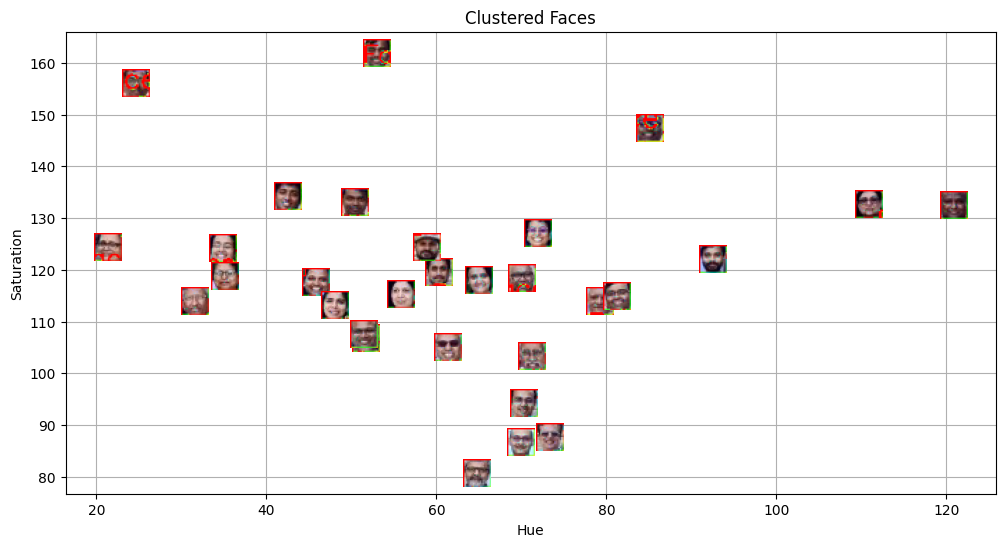

In [4]:

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustered Faces")
plt.grid()
plt.show()

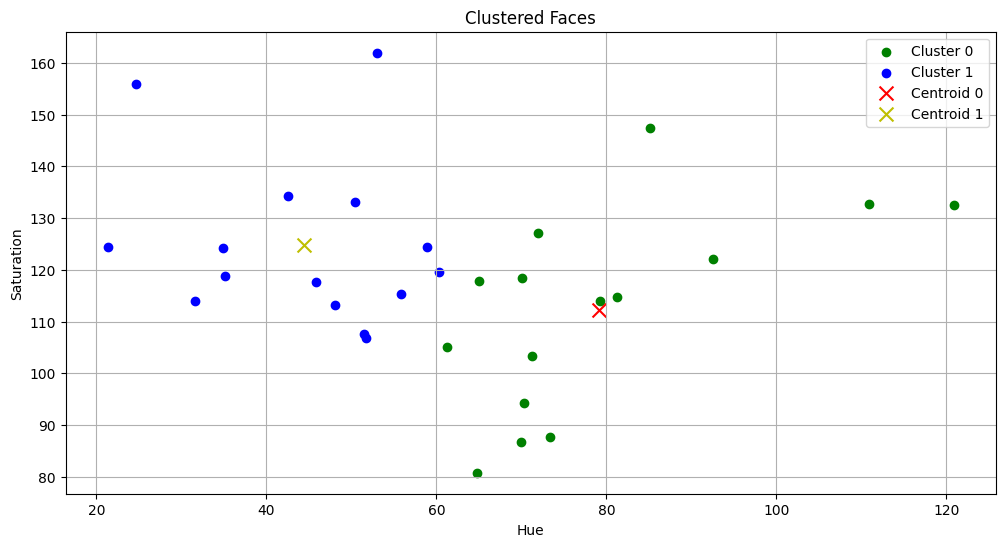

In [5]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='g', label='Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='b', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='r', label='Centroid 0', marker='x', s=100)
plt.scatter(centroid_1[0], centroid_1[1], c='y', label='Centroid 1', marker='x', s=100)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clustered Faces")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.show()


In [6]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = "Dr_Shashi_Tharoor.jpg"
template_img = cv2.imread(template_img)
# Detect face  in the template image after converting it to gray and store it in template_faces
template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_img, 1.05, 4, minSize=(30,30), maxSize=(1000,1000))


# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (255, 0, 0), 3)
    cv2.putText(template_img, "Face Detected Shashi", (x, y - 10), font, font_scale, (255, 0, 0), font_thickness)

cv2.imshow("Detected faces in template image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

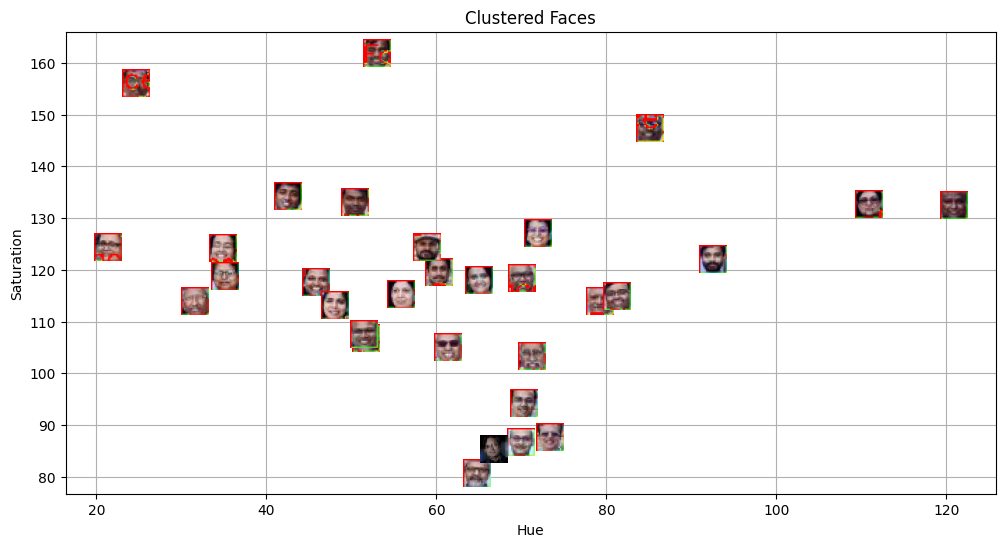

In [7]:
# Convert the template image to HSV color space and store it in template_hsv
template_img = "Dr_Shashi_Tharoor.jpg"
template_img = cv2.imread(template_img)
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clustered Faces")
## Add grid
plt.grid()
## show plot
plt.show()

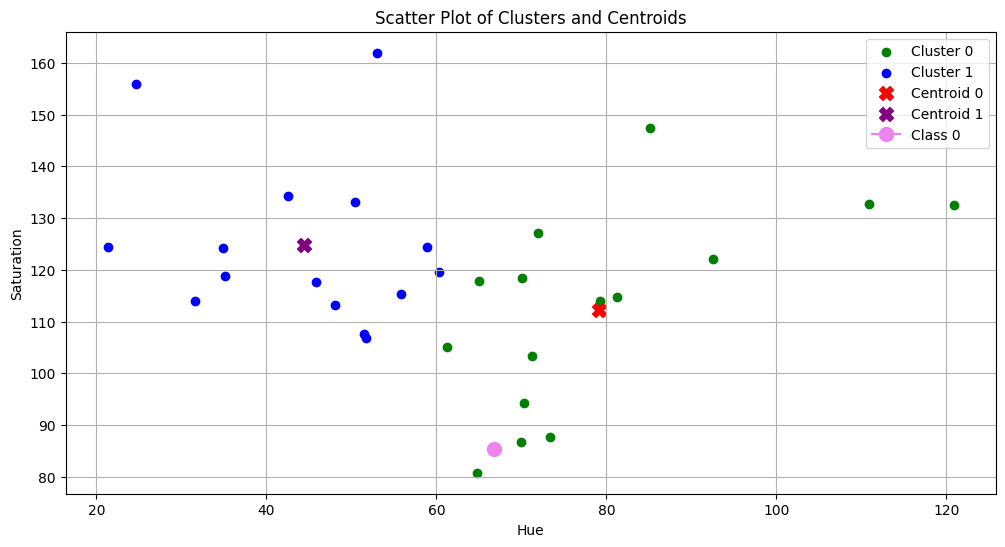

In [8]:
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

# Assuming faces_rect and hue_saturation are defined
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='g', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='b', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = centroids[0]
centroid_1 = centroids[1]
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=100, label='Centroid 0')  # Red X for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='purple', marker='X', s=100, label='Centroid 1')  # Purple X for centroid 1

# Plot the template point
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class {}'.format(template_label))

# Add x and y labels
plt.xlabel('Hue')
plt.ylabel('Saturation')

# Add title
plt.title('Scatter Plot of Clusters and Centroids')

# Add a legend
plt.legend()

# Add grid
plt.grid(True)

# Show the plot
plt.show()


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

Ans1) Some of the common distance metrics used in distance based classification are Eucledian distance, Mahalanobis distance, Manhattan distance, Chebyshev distance, Minkowski distance, Cosine distance and Hamming distance. These are generally used in distance based classification algorithms.

Ans2) Some of the real world applications are: Disease Prediction, Medical Image Analysis, Face recognitions, fingerprint and iris matching, spam detection, object classification, and many more

Ans3) Eucledian distance - Represents the shortest distance between two vectors.

Mahalanobis Distance - Represents the distance between a point P and a distribution D.
The idea is to measure how many standard deviations away P is from the mean of D.
Advantage over Euclidean is that it also takes variance into account.

Manhattan Distance - Distance between two points measured along axes at right angles.
Because of sparsity, it has been shown to work better than Euclidean distance in very high dimensional spaces. Applications in knowing distance between houses in organized cities, length of wire connections in an integrated circuit, etc.

Chebyshev Distance - It is defined on a vector space where the distance between two vectors is the greatest of their differences along any coordinate dimension.
It is often used in warehouse logistics to calculate time taken by an overhead crane to move an object.

Minkowski Distance - A generalized distance metric which can be modified by substituting the value of ‘p’ to calculate the distance between two points.

Cosine Distance - Degree of angle between two vectors (called frequencies for words in documents). It is used when the magnitude does not matter but rather their orientation matters. Often used in finding similarities between documents, recommender systems, computing cohesion within clusters in unsupervised learning, human pose matching based on joint coordinates, etc.

Hamming Distance - Comparing two strings (or bits), number of positions in which the two strings (or bits) are different. Measures the minimum number of substitutions required to change one string into the other

Ans4) Cross-validation (CV) is a critical technique in machine learning used to evaluate and improve model performance. It helps ensure that the model generalizes well to unseen data by mitigating overfitting and providing a more reliable estimate of its accuracy.

Ans5) Bias refers to how much a model's predictions deviate from the actual values. A high-bias model makes strong assumptions about the data, leading to underfitting.
Variance refers to how much a model’s predictions change with different training datasets. A high-variance model is too sensitive to training data, leading to overfitting.